<a href="https://colab.research.google.com/github/sahar7888/CheatSheet/blob/main/Tensorflow_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import cv2
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# Function to generate random circular dataset
def generate_circular_dataset(n_samples, radius, noise):
    theta = np.random.rand(n_samples) * 2 * np.pi
    x = radius * np.cos(theta) + np.random.normal(scale=noise, size=n_samples)
    y = radius * np.sin(theta) + np.random.normal(scale=noise, size=n_samples)
    return np.column_stack((x, y))


In [5]:
# Generate random circular dataset for class 0 and class 1
n_samples = 1000
radius_0 = 3
radius_1 = 5
noise = 0.1


In [6]:
X_class_0 = generate_circular_dataset(n_samples // 2, radius_0, noise)
y_class_0 = np.zeros((n_samples // 2,), dtype=int)

X_class_1 = generate_circular_dataset(n_samples // 2, radius_1, noise)
y_class_1 = np.ones((n_samples // 2,), dtype=int)

X = np.vstack((X_class_0, X_class_1))
y = np.hstack((y_class_0, y_class_1))

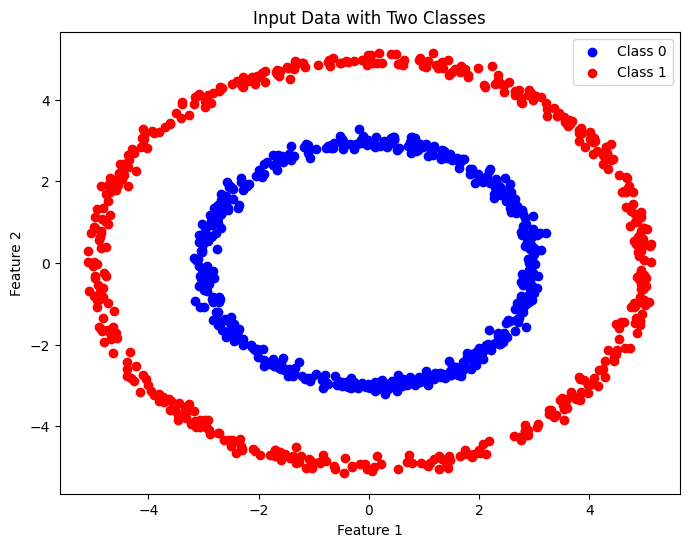

In [7]:
# Visualize input data with different colors for each class
plt.figure(figsize=(8, 6))
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], color='blue', label='Class 0')
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], color='red', label='Class 1')
plt.title('Input Data with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [8]:
# Shuffle the dataset
shuffle_idx = np.random.permutation(n_samples)
X = X[shuffle_idx]
y = y[shuffle_idx]


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # No need for dimensionality reduction in this case
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [13]:
# Compile the model with a learning rate and early stopping
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [15]:
# Train the model with early stopping
history = model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/50
20/20 [==============================] - 2s 36ms/step - loss: 0.7395 - accuracy: 0.4703 - val_loss: 0.6678 - val_accuracy: 0.5063
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5344 - val_loss: 0.6516 - val_accuracy: 0.5063
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6614 - accuracy: 0.5344 - val_loss: 0.6439 - val_accuracy: 0.5063
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6423 - accuracy: 0.5359 - val_loss: 0.6343 - val_accuracy: 0.5063
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6342 - accuracy: 0.5656 - val_loss: 0.6241 - val_accuracy: 0.5125
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6299 - accuracy: 0.5781 - val_loss: 0.6145 - val_accuracy: 0.5375
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6209 - accuracy: 0.5734 - val_loss: 0.6025 - val_accuracy: 0.5500
Epoch 8/50
20/20 [=

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 1.0000
Test accuracy: 1.0


In [17]:
# Make predictions
y_pred_proba = model.predict(X_test_pca)
y_pred = np.round(y_pred_proba).flatten()

7/7 [==============================] - 0s 4ms/step


In [18]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

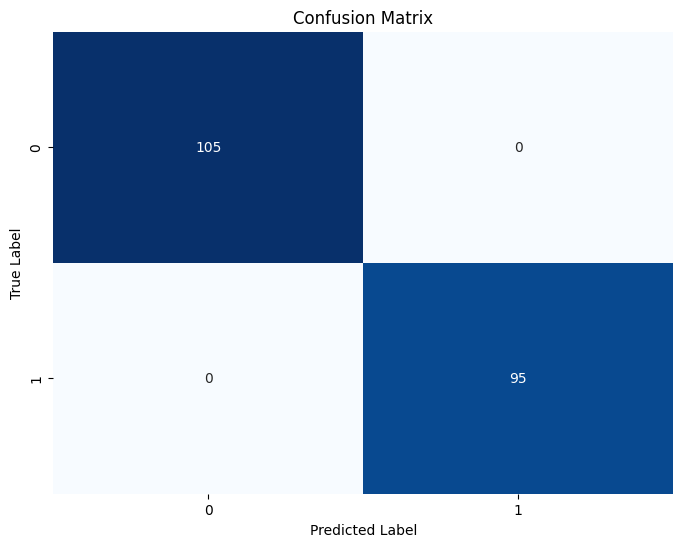

In [19]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

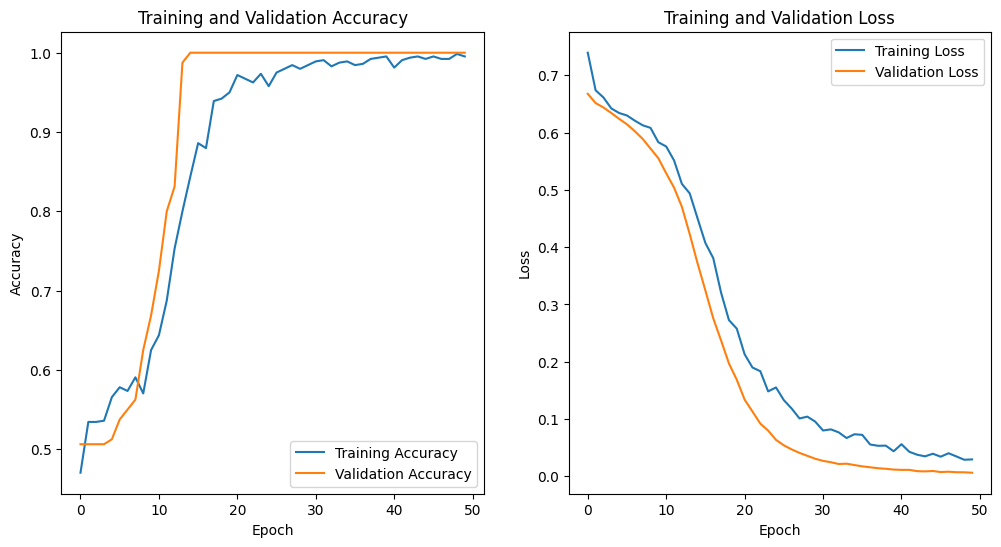

In [21]:
# Plot training and test accuracy over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


# Plot training and test loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
# Save the trained model
model.save('my_model')

# Load the saved model
loaded_model = tf.keras.models.load_model('my_model')

# Create new data for prediction
X_new = np.array([[2.5, 4.5], [4.0, 2.0]])  # Example new data

# Perform prediction using the loaded model
predictions = loaded_model.predict(X_new)

# Print the predicted labels
for i, pred in enumerate(predictions):
    print(f'Prediction for sample {i+1}: {pred}')

1/1 [==============================] - 0s 69ms/step
Prediction for sample 1: [0.99503875]
Prediction for sample 2: [0.9050247]
